# Project: Store Retail Analytics

Project Objective: 
- To utilize the machine learning and data analysis technique to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies.

Content:
- Import the Libraries
- Upload the dataset
- Understanding the Dataset
- Merging the Dataset
- EDA and Data Visualization
- Hypothesis 1: Anomaly detection in Sales Data
- Hypothesis 2: Times Series Anomaly detection in Sales Data
- Hypothesis 3: Customer Segmentation
- Hypothesis 4: Demand Forecasting
- Hypothesis 5: Impact of External Factors
- Hypothesis 6:Personalization Strategies
- Hypothesis 7: Strategy and Real-World Application

In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Load the dataset
data_features = pd.read_csv(r'Features data set.csv')
data_stores = pd.read_csv(r'stores data-set.csv')
data_sales = pd.read_csv(r'sales data-set.csv')

##### Notes:
There are 3 given datasets:
- 1) Features
- 2) Store
- 3) Sales

## Understanding the 1st Features Dataset

In [6]:
# Top 5 rows of features
data_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
# Last 5 rows of features
data_features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [8]:
# Shape of Feature Data
data_features.shape

(8190, 12)

##### Notes:
There are 12 features are given in Feature Dataset

In [9]:
data_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [10]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
data_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


## Understanding the 2nd Stores Dataset

In [13]:
# Top 5 rows of Store Data
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
# Last 5 rows of Store Data
data_stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [15]:
# Shape of Store Data
data_stores.shape

(45, 3)

In [16]:
# Total Columns of Store Data
data_stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [17]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [18]:
# Descriptive Summary of Store Data
data_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


## Understanding the Sales Dataset

In [20]:
# Top 5 rows of Sales Data
data_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [21]:
# Last 5 rows of Sales Data
data_sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [22]:
# Shape of Sales 
data_sales.shape

(421570, 5)

In [23]:
# Total Columns
data_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [24]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [25]:
# Descriptive Summary of Sales Data
data_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


## Merging The datset

- In First Merge between Sales and Store dataset on left join to ensure all data of sales are there 

In [28]:
# First merge
sales_stores = pd.merge(data_sales, data_stores, on="Store", how="left")
sales_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


- In Second Merge between first_merge and Feature dataset on left join to ensure all data of sales_stores are not missed 

In [30]:
# Second merge
full_data = pd.merge(sales_stores, data_features, on=["Store", "Date"], how="left")
full_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [31]:
# After Merging there are 2 column are processed, so removing one of them.
full_data['IsHoliday'] = full_data['IsHoliday_y']
full_data.drop(['IsHoliday_x','IsHoliday_y'],inplace=True, axis=1)
full_data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [32]:
# Creating new column Monthly
full_data['Date'] = pd.to_datetime(full_data['Date'], format='%d/%m/%Y')

In [33]:
# Extract month name 
full_data['Monthly'] = full_data['Date'].dt.strftime('%B')
full_data['Monthly']

0          February
1          February
2          February
3          February
4             March
            ...    
421565    September
421566      October
421567      October
421568      October
421569      October
Name: Monthly, Length: 421570, dtype: object

In [34]:
# Creating new column Year and quarter
full_data['Year'] = full_data['Date'].dt.year
full_data['Year'] = full_data['Year'].astype(int)
full_data['Quarter'] = full_data['Date'].dt.to_period('Q').astype(str)

In [35]:
full_data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Monthly,Year,Quarter
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,February,2010,2010Q1
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,February,2010,2010Q1
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,February,2010,2010Q1
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,February,2010,2010Q1
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,March,2010,2010Q1


##### Notes:
- This is a final dataset after merging all of 3 datasets.

## EDA

### Handle Missing Values

In [38]:
full_data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Monthly              0
Year                 0
Quarter              0
dtype: int64

In [39]:
(full_data.isnull().sum()/len(full_data))*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
IsHoliday        0.000000
Monthly          0.000000
Year             0.000000
Quarter          0.000000
dtype: float64

##### Notes:
- In dataset there are all Markdown feature are having missing Values.

In [40]:
# Filling missing values of all Markdown with 0. Since play effective role in analysis
full_data.fillna(0, inplace=True)

In [41]:
(full_data.isnull().sum()/len(full_data))*100

Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
IsHoliday       0.0
Monthly         0.0
Year            0.0
Quarter         0.0
dtype: float64

In [42]:
full_data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Monthly,Year,Quarter
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,February,2010,2010Q1
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,February,2010,2010Q1
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,February,2010,2010Q1
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,February,2010,2010Q1
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,March,2010,2010Q1


### Handle Duplicate Values

In [44]:
print(full_data.duplicated().sum())

0


##### Notes:
- No Duplicate Values

#### Unique Values as per columns

In [46]:
for column in full_data.columns:
    unique_vals = full_data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_vals)
    print('-' * 40)  # Separator for readability

Unique values in 'Store':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
----------------------------------------
Unique values in 'Dept':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
----------------------------------------
Unique values in 'Date':
<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00

## Data Visualization

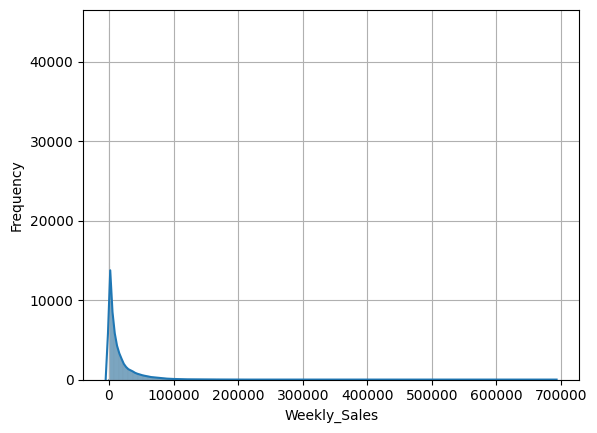

In [48]:
# Plot histogram of Sales
sns.histplot(data = full_data, x = "Weekly_Sales", kde = True)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Notes:
- The data is right-skewed-
- Meaning most of the sales figures are on the lower end, with fewer instances of very high sales.

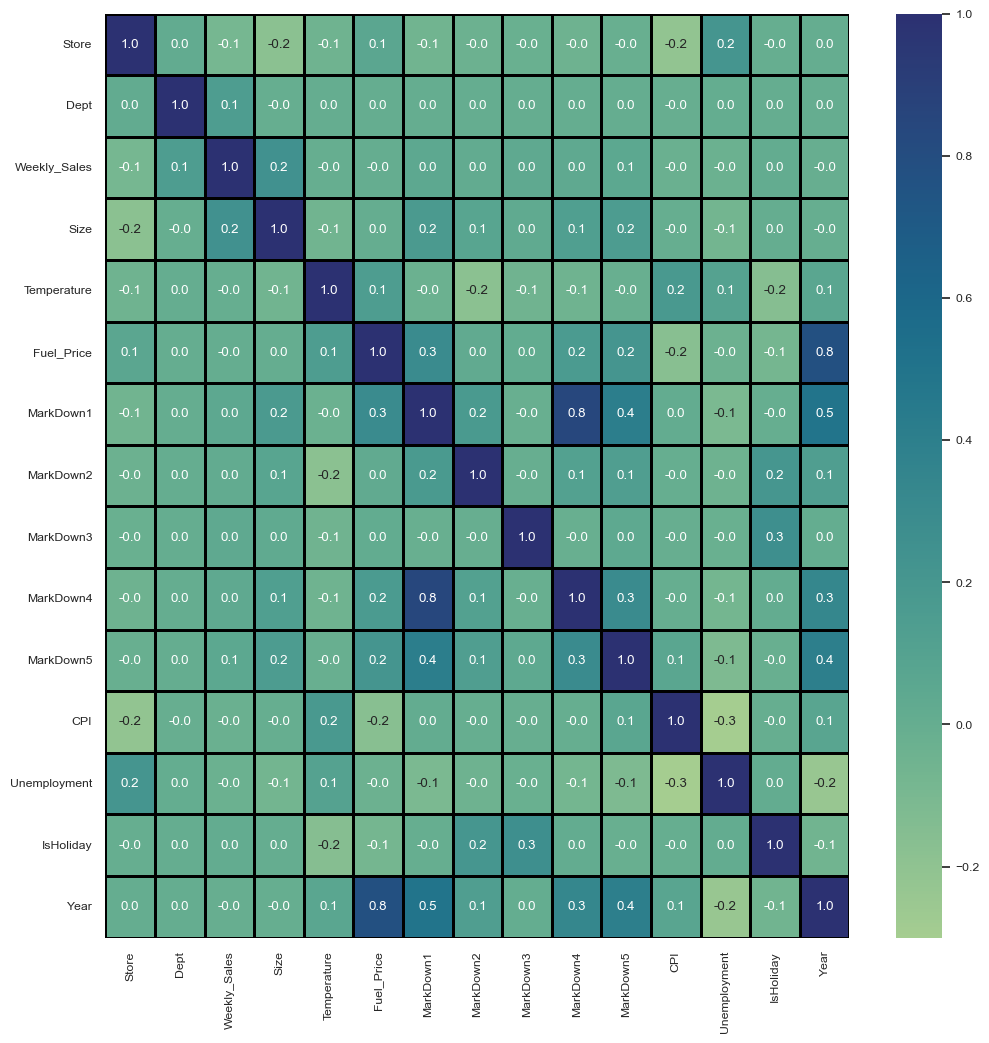

In [49]:
# Correlation Matrix
full_data.corr(numeric_only=True)
plt.figure(figsize = (12, 12))
sns.set(font_scale=0.8)
dataplot = sns.heatmap(full_data.corr(numeric_only=True),cmap="crest", annot=True,fmt='.1f', linewidth=2, linecolor="black")
plt.savefig("Correlation_Matrix.png", dpi=80, bbox_inches='tight')
plt.show()

##### Notes:
- Positive Correlations between 'Weekly_Sales', 'Size' and 'MarkDown4'.
- There's a slight negative correlation between 'Weekly_Sales' and 'Unemployment', implying that higher unemployment might be associated with slightly lower weekly sales.


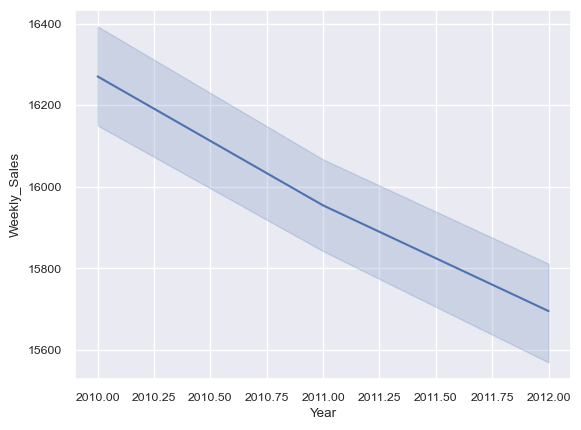

In [50]:
# Trend of Sales over Year
plt.figsize=(20, 5)
sns.lineplot(x="Year", y="Weekly_Sales", data=full_data)
plt.show()

##### Notes:
- There are decreasing trend in average weekly sales from 2010 to 2012. 

## Hypothesis 1: Anomaly detection in Sales Data

- Goal -  To identify unusual patterns or outliers in weekly sales data that deviate significantly from expected trends, potentially indicating special events, errors, or anomalies 
- Methodology - Using Isolation Forest for Anomaly detection
- Focus on how easily each data point can be isolated. 

In [53]:
full_data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Monthly,Year,Quarter
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,February,2010,2010Q1
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,February,2010,2010Q1
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,February,2010,2010Q1
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,February,2010,2010Q1
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,March,2010,2010Q1


In [54]:
# Doing Label Encoding on Monthly
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
full_data['Monthly_Encoded']= label_encoder.fit_transform(full_data['Monthly'])
full_data['Monthly_Encoded'].unique()

array([ 3,  7,  0,  8,  6,  5,  1, 11, 10,  9,  2,  4])

In [55]:
# Feature Selection For Anamoly Detection
featuress = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Monthly_Encoded']
X_features = full_data[featuress]

In [56]:
# Isolation Forest for Anomaly Detection
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
full_data['anomaly'] = iso_forest.fit_predict(X_features)

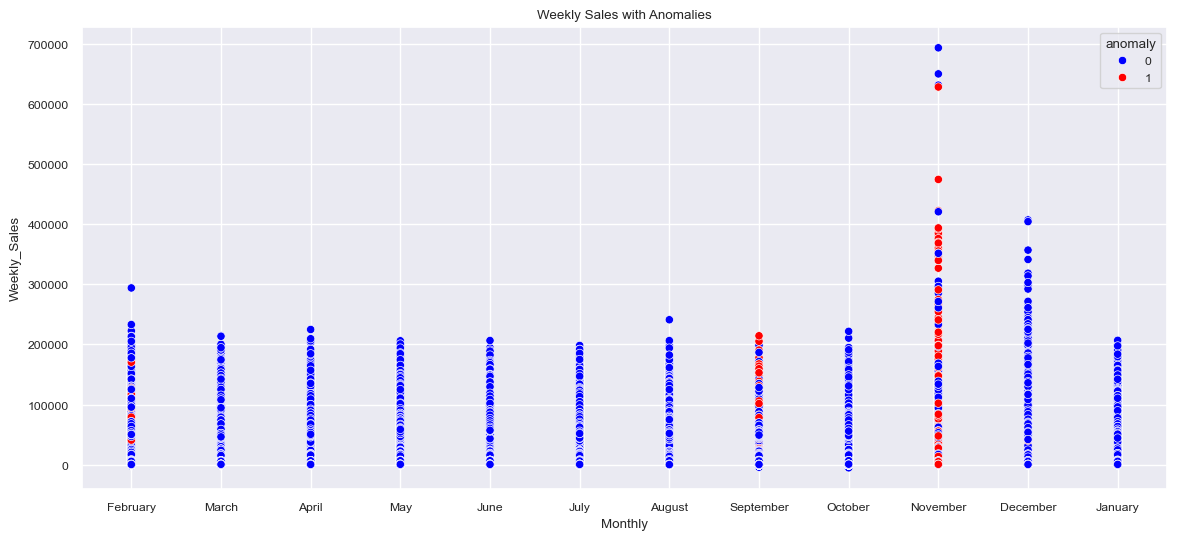

In [57]:
# Convert to 0 (normal), 1 (anomaly)
full_data['anomaly'] = full_data['anomaly'].apply(lambda x: 1 if x == -1 else 0)
plt.figure(figsize=(14,6))
sns.scatterplot(x='Monthly', y='Weekly_Sales', hue='anomaly', palette={0: 'blue', 1: 'red'}, data=full_data)
plt.title("Weekly Sales with Anomalies")
plt.show()

#### Intrepretations:
- Blue (0) = Normal sales
- Red (1) = Anomaly in sales or Outliers
- Month like September and November have a great sales.
- Especially in November because of Festive seasons like Thanksgiving or events like Black Friday.

## Hypothesis 2: Times Series Anomaly detection in Sales Data

- Goal: To detect anomalous patterns in the sequence of weekly sales data over time, identifying deviations from expected seasonal or trend behaviors that could represent significant events or irregularities.
- Methodolody - Using Prophet
- Focus -  Prophet helps decompose sales data to reveal underlying growth trends and recurring seasonal patterns. This allows businesses to understand why sales fluctuate 

In [60]:
full_data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Monthly,Year,Quarter,Monthly_Encoded,anomaly
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,False,February,2010,2010Q1,3,0
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,...,0.0,0.0,211.242170,8.106,True,February,2010,2010Q1,3,1
2,1,1,2010-02-19,41595.55,A,151315,39.93,2.514,0.0,0.0,...,0.0,0.0,211.289143,8.106,False,February,2010,2010Q1,3,0
3,1,1,2010-02-26,19403.54,A,151315,46.63,2.561,0.0,0.0,...,0.0,0.0,211.319643,8.106,False,February,2010,2010Q1,3,0
4,1,1,2010-03-05,21827.90,A,151315,46.50,2.625,0.0,0.0,...,0.0,0.0,211.350143,8.106,False,March,2010,2010Q1,7,0


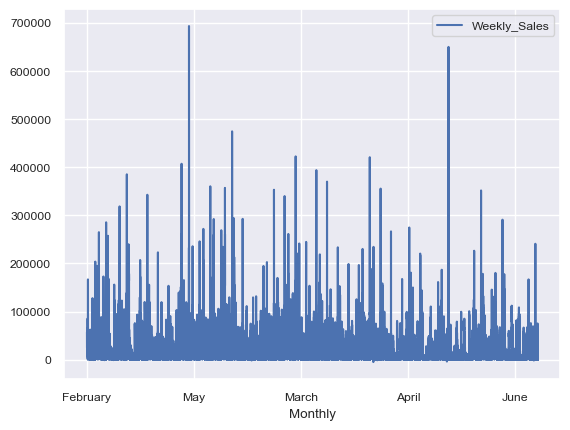

In [61]:
# Plot between Monthly and Weekly Sales
graph = full_data.plot('Monthly','Weekly_Sales' )
plt.show()

##### Notes:
- There are significant fluctuations with many peaks.
- There appears to be some underlying cyclical pattern to the sales, with periods of higher and lower activity.

#### Implementing Prophet for Sales and Date Forecasting

In [63]:
import matplotlib.pyplot as plt
from prophet import Prophet

In [64]:
# Create a dataset sales and data
sales_date = full_data
sales_date = sales_date.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

In [65]:
# Initialize the model
model = Prophet()
# Fit the model
model.fit(sales_date)

18:34:50 - cmdstanpy - INFO - Chain [1] start processing
18:34:59 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
# Create a dataframe to hold the dates for which we want to make predictions
future = model.make_future_dataframe(periods=365)
# Predict future sales
forecast = model.predict(future)

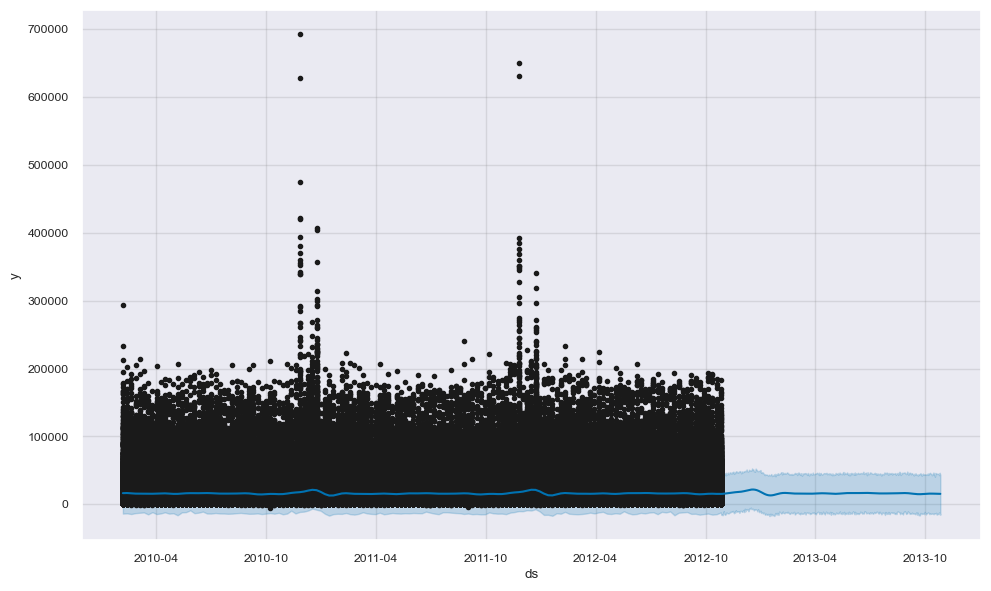

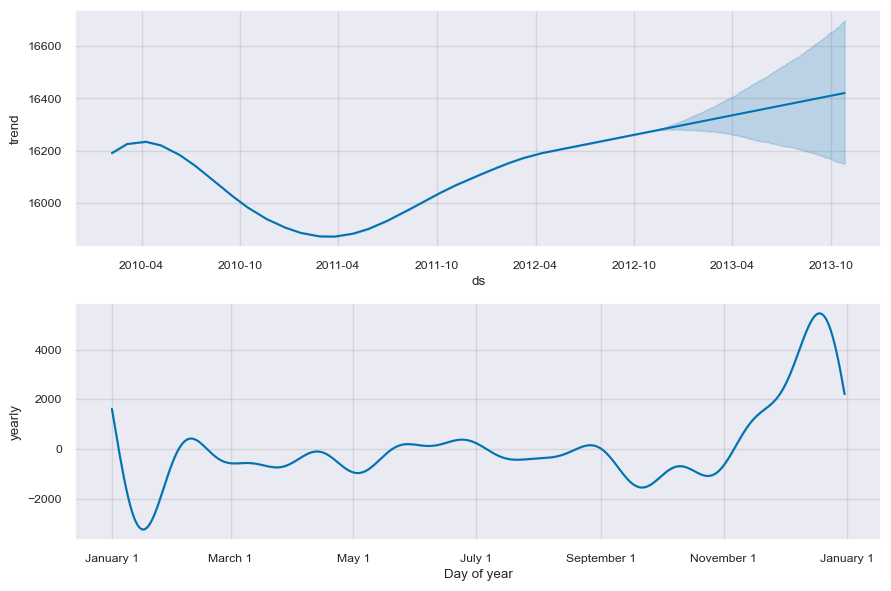

In [67]:
# plot forecast
model.plot(forecast)

#plot forecast component
model.plot_components(forecast)
plt.savefig("Prophet of Sales & Date.png", dpi=80, bbox_inches='tight')

##### Notes:
Graph 1: Between Sales and Date
- Black Points represents Weekly Sales over time.
- Blue Shaded shows uncertainity.

Graph 2: Trend
- Shows the long-term trend of 'Weekly_Sales' from 2010 to 2013.
- There is a initial decline in sales from 2010 to 2011, followed by a consistent upward trend.
- The shaded area represents the uncertainty or confidence interval around trend.
 
Graph 3: Yearly Seasonality
- It indicates that sales first goes downward significantly around January & February, then gradually rise.
- There is peaks towards the end of the year (November/December)

## Hypothesis 3: Customer Segmentation
- Goal: To divide customers into distinct groups based on shared characteristics or behaviors
- Methodology: Performing KMeans and PCA
- Focus: KMeans and PCA is best unsupervised learning model for creating clusters based on simlarity.

In [69]:
seg_data = full_data

In [70]:
seg_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Monthly', 'Year',
       'Quarter', 'Monthly_Encoded', 'anomaly'],
      dtype='object')

In [71]:
# Step 1: Label Encoding of Categorical Variables
label_encoder = preprocessing.LabelEncoder()

# Column 'Type'
seg_data['Type']= label_encoder.fit_transform(seg_data['Type'])
print(seg_data['Type'].unique())

[0 1 2]


In [72]:
# Step 2: Feature Selection
# seg_features = seg_data[['Dept', 'Weekly_Sales', 'Type', 'Size', 'IsHoliday', 'Monthly_Encoded']]
seg_features = seg_data[['Store','Type','Size','Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5']]

In [73]:
# Calculate the mean of numerical columns, keeping 'Store' and 'Type' as is
seg_features = seg_data.groupby(['Store', 'Type']).agg({
    'Size': 'first',  # Size is constant for each store
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean'
}).reset_index()

print(seg_data.head())

   Store  Dept       Date  Weekly_Sales  Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50     0  151315        42.31   
1      1     1 2010-02-12      46039.49     0  151315        38.51   
2      1     1 2010-02-19      41595.55     0  151315        39.93   
3      1     1 2010-02-26      19403.54     0  151315        46.63   
4      1     1 2010-03-05      21827.90     0  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  ...  MarkDown4  MarkDown5         CPI  \
0       2.572        0.0        0.0  ...        0.0        0.0  211.096358   
1       2.548        0.0        0.0  ...        0.0        0.0  211.242170   
2       2.514        0.0        0.0  ...        0.0        0.0  211.289143   
3       2.561        0.0        0.0  ...        0.0        0.0  211.319643   
4       2.625        0.0        0.0  ...        0.0        0.0  211.350143   

   Unemployment  IsHoliday   Monthly  Year  Quarter Monthly_Encoded  anomaly  
0         8.106      False  Feb

In [74]:
# Step 2: Standardize all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(seg_features)
print(f"\nFirst 5 scaled data points:\n{X_scaled[:5]}")


First 5 scaled data points:
[[-1.69397911 -0.91523188  0.33317532  0.90473803  0.33089337  0.08959062
  -0.01010726  0.49959311  0.20208632]
 [-1.61698006 -0.91523188  1.14113426  1.65298651  1.01766423  1.41539006
   0.60407103  1.05437606  0.74395185]
 [-1.53998101  0.50495552 -1.47191384 -1.30754338 -0.98772992 -1.00988588
  -0.53731317 -1.06959527 -1.12261298]
 [-1.46298196 -0.91523188  1.19747843  1.97942173  0.67567674  1.05380822
   0.88507836  1.26525107  0.8383128 ]
 [-1.38598291  0.50495552 -1.51179524 -1.49788502 -1.00674701 -0.99870764
  -0.72823406 -0.95086123 -0.66789538]]


#### Perform KMeans

In [77]:
from sklearn.cluster import KMeans
# Determining Optimal K using the Elbow Method
inertia = []
# Test k values from 1 to 10
k_range = range(1, 11)

for k in k_range:
    # Initialize KMeans with the current k
    # n_init='auto' is recommended for modern scikit-learn versions
    kmeans_model_for_elbow = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model_for_elbow.fit(X_scaled)
    # Append the inertia (sum of squared distances of samples to their closest cluster center)
    inertia.append(kmeans_model_for_elbow.inertia_)

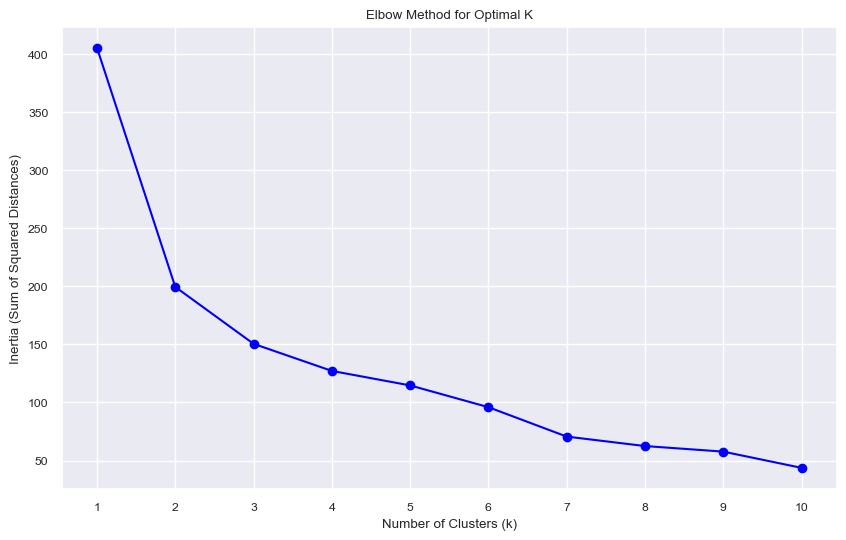

In [78]:
# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [79]:
n_clusters_kmeans = 2
print(f"\nApplying K-Means with k = {n_clusters_kmeans}")


Applying K-Means with k = 2


In [80]:
# Initialize and Fit the K-Means Model
# random_state: ensures reproducibility of centroid initialization.
# n_init='auto': modern recommendation for initializing centroids multiple multiple times and picking the best result.
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init='auto')
kmeans.fit(X_scaled) # Fit the model to the scaled data

KMeans(n_clusters=2, random_state=42)

In [81]:
# Get the cluster labels assigned by K-Means
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

In [82]:
print(f"First 10 K-Means assigned cluster labels:\n{kmeans_labels[:10]}")
print(f"K-Means centroids (scaled):\n{kmeans_centroids}")

First 10 K-Means assigned cluster labels:
[0 0 1 0 1 0 1 0 1 0]
K-Means centroids (scaled):
[[-0.12419202 -0.41129442  0.5527942   0.46430758  0.57576917  0.55362098
   0.49354044  0.57024834  0.38894609]
 [ 0.27499661  0.91072335 -1.2240443  -1.02810965 -1.27491744 -1.22587502
  -1.09283955 -1.26269274 -0.86123776]]


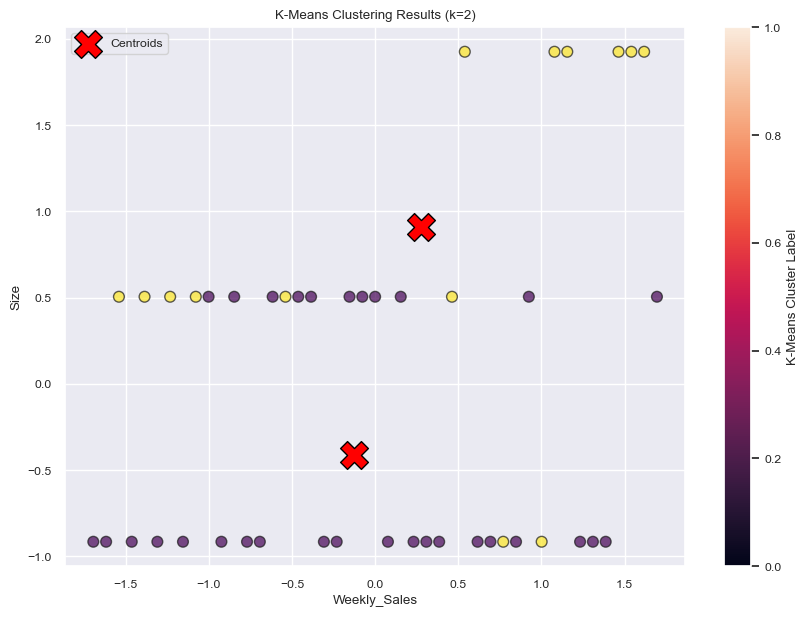

In [83]:
# Visualize K-Means Clustering Results
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, s=60, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', s=400, marker='X', label='Centroids', edgecolor='black')
plt.title(f"K-Means Clustering Results (k={n_clusters_kmeans})")
plt.xlabel('Weekly_Sales')
plt.ylabel('Size')
plt.legend()
plt.grid(True)
plt.colorbar(label='K-Means Cluster Label')
plt.show()

##### Intrepretation
- 'X' markers indicate the centroids of 2 clusters.
- Each point on the plot now represents a store.
- Color indicates the cluster (0 or 1) to which that store has been assigned.
- The K-Means algorithm has partitioned the stores into two distinct segments based on the patterns in their average weekly sales, store size, and average markdown amounts.

Cluster 1 could represent:
- Lower-performing stores, possibly with a focus on smaller formats or different operational strategies.
- Stores that might require strategies to boost sales, optimize inventory, or target a different customer segment.

  
Cluster 2 could represent:
- Higher-performing stores, potentially including flagship stores or those in high-traffic areas.
- Stores that might serve as benchmarks for best practices, or where resources could be allocated to maximize their existing success.

#### Evaluation Metrics for K-Means Clustering

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
# 5. Silhouette Score: Measures how similar an object is to its own cluster (cohesion) compared to other
#    clusters (separation). A higher value indicates better-defined clusters.
#    This metric does NOT require true labels (y_true), making it useful when ground truth is unknown.
#    Score ranges from -1 to 1.
#    - Close to +1: The sample is far away from the neighboring clusters.
#    - Close to 0: The sample is on or very close to the decision boundary between two neighboring clusters.
#    - Close to -1: The sample might have been assigned to the wrong cluster.
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score (on scaled data): {silhouette_avg:.4f}")


Silhouette Score (on scaled data): 0.4287


#### Perform PCA

In [89]:
from sklearn.decomposition import PCA
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X_scaled)

print(f"Data shape after PCA: {X_pca.shape}")
print(f"First 5 data points after PCA:\n{X_pca[:5]}")

Data shape after PCA: (45, 2)
First 5 data points after PCA:
[[ 1.38288302 -1.04843886]
 [ 3.26787538 -0.85644153]
 [-2.55340648 -1.94450424]
 [ 3.32025612 -0.68597195]
 [-2.55959464 -1.60932714]]


In [90]:
# Explained variance ratio: How much information (variance) each component captures.
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio per component: {explained_variance_ratio}")
print(f"Cumulative explained variance: {explained_variance_ratio.sum():.2f}")

Explained variance ratio per component: [0.69854702 0.10934114]
Cumulative explained variance: 0.81


C:\Users\bsson\AppData\Local\Temp\ipykernel_11336\755492532.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1],  s=60, cmap='tab10', alpha=0.7, edgecolor='k')


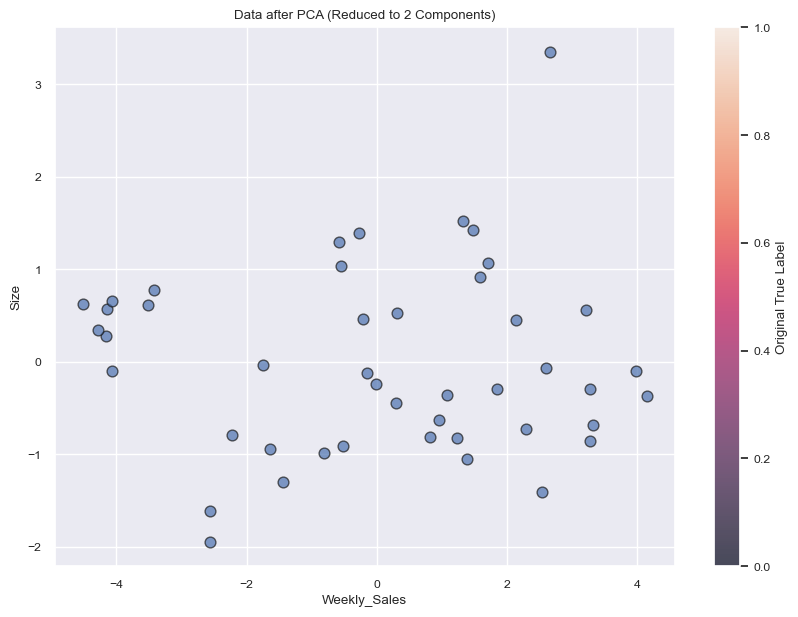

In [91]:
# Visualize data after PCA (still using original true labels for context)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1],  s=60, cmap='tab10', alpha=0.7, edgecolor='k')
plt.title(f"Data after PCA (Reduced to {n_components_pca} Components)")
plt.xlabel('Weekly_Sales')
plt.ylabel('Size')
plt.grid(True)
plt.colorbar(label='Original True Label')
plt.show()

##### Intrepretaions:
- Each point on this scatter plot represents a store.
- Stores that are close to each other in this 2D space are more similar to each other in terms of their overall, multi-dimensional feature profiles.

## Hypothesis 4: Demand Forecasting

Goal:
- Build models to forecast weekly sales for each store and department.
- Incorporate factors like CPI, unemployment rate, fuel prices, and store/department attributes.
- Explore short-term and long-term forecasting models.

Methodology:
- Using Prophet with Regressors

Focus: The model can help in quantify the impact of each regressor on sales.

In [95]:
full_data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Monthly,Year,Quarter,Monthly_Encoded,anomaly
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,...,0.0,0.0,211.096358,8.106,False,February,2010,2010Q1,3,0
1,1,1,2010-02-12,46039.49,0,151315,38.51,2.548,0.0,0.0,...,0.0,0.0,211.242170,8.106,True,February,2010,2010Q1,3,1
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,...,0.0,0.0,211.289143,8.106,False,February,2010,2010Q1,3,0
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.0,0.0,...,0.0,0.0,211.319643,8.106,False,February,2010,2010Q1,3,0
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,0.0,0.0,...,0.0,0.0,211.350143,8.106,False,March,2010,2010Q1,7,0


In [96]:
full_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Monthly', 'Year',
       'Quarter', 'Monthly_Encoded', 'anomaly'],
      dtype='object')

In [97]:
market_data = full_data

In [98]:
# 0.  Specify the Target Department
target_dept = 1

In [99]:
# 1. Select Department Data
dept_data = market_data[market_data ['Dept'] == target_dept].copy()

In [100]:
# 2. Aggregate Weekly Sales and Regressors
weekly_data = dept_data.groupby('Date').agg({'Weekly_Sales':'sum', 'CPI':'mean', 'Unemployment':'mean', 'Fuel_Price':'mean'}).reset_index()

In [101]:
# 3. Prepare Data for Prophet
weekly_data = weekly_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
weekly_data['ds'] = pd.to_datetime(weekly_data['ds'])

In [102]:
# 4. Initialize and Fit Prophet Model
model2 = Prophet()
model2.add_regressor('CPI')
model2.add_regressor('Unemployment')
model2.add_regressor('Fuel_Price')
model2.fit(weekly_data)

18:35:06 - cmdstanpy - INFO - Chain [1] start processing
18:35:06 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
# 5. Create Future DataFrame
future = model2.make_future_dataframe(periods=52, freq='W')

In [104]:
# 6. Prepare Future Regressor Values (Placeholder!)
future_regressors = full_data.groupby('Date').agg({'CPI': 'mean', 'Unemployment': 'mean', 'Fuel_Price': 'mean'}).reset_index().tail(52)  # Last 52 weeks as a placeholder
future = future.merge(future_regressors[['CPI', 'Unemployment', 'Fuel_Price']], how='left', left_index=True, right_index=True)
future = future.fillna(method='ffill')

C:\Users\bsson\AppData\Local\Temp\ipykernel_11336\3970980963.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future = future.fillna(method='ffill')


In [105]:
# 6. Prepare Future Regressor Values (using the last known values)
last_regressors = weekly_data[['ds', 'CPI', 'Unemployment', 'Fuel_Price']].tail(1).set_index('ds')
future = future.set_index('ds')
future['CPI'] = last_regressors['CPI'].iloc[0]
future['Unemployment'] = last_regressors['Unemployment'].iloc[0]
future['Fuel_Price'] = last_regressors['Fuel_Price'].iloc[0]
future = future.reset_index()
future = future[['ds', 'CPI', 'Unemployment', 'Fuel_Price']] 

In [106]:
# 7. Make Forecast
forecast = model2.predict(future)

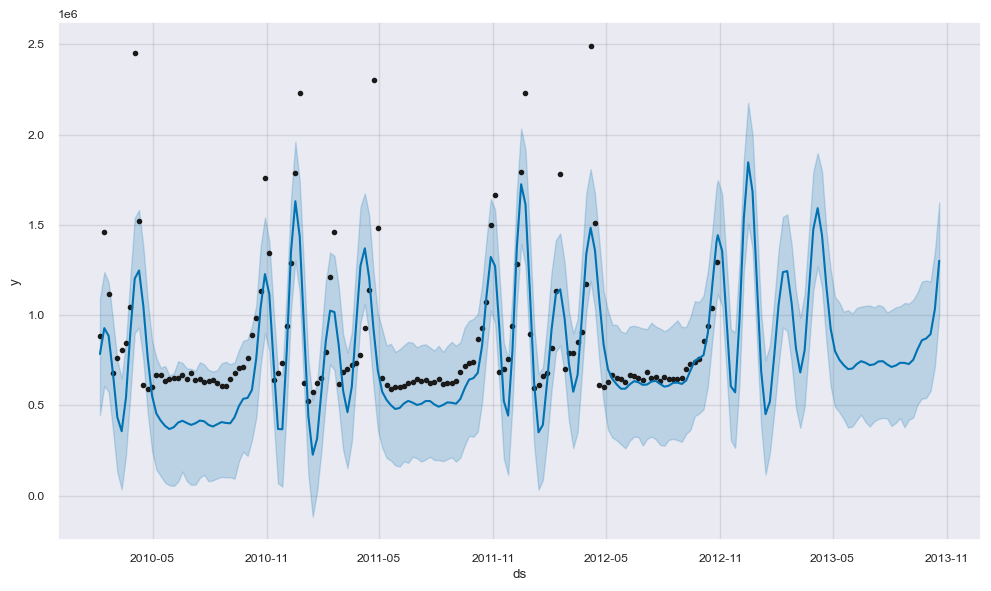

In [107]:
# plot forecast
model2.plot(forecast)
plt.show()

#### Intrepretation:
First Graph 
- Black Dots: Sales data points
- Blue Line: This is the Prophet model's forecast
- Light Blue Shaded Area: This represents the uncertainty interval around the forecast. The uncertainty generally widens as we go further into the future
- There's a clear repeating pattern each year, with peaks and troughs at roughly the same times.
- There are some periods where the actual data (black dots) falls outside the uncertainty interval


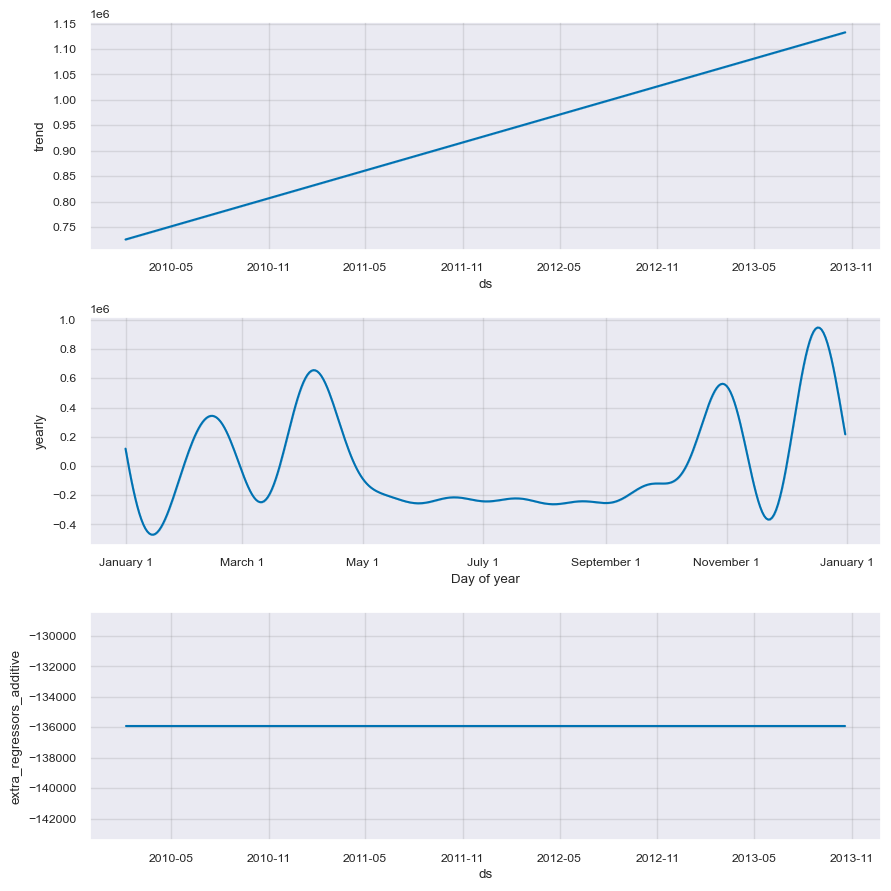

In [109]:
#plot forecast component
model2.plot_components(forecast)
plt.savefig("Demand_Forecasting.png", dpi=80, bbox_inches='tight')

#### Intrepretation:
- Trend: Shows the overall direction of the main value (like total sales) over time.
- Yearly Seasonality: Shows patterns that repeat every year. The ups and downs indicate times of the year when the value is typically higher or lower than average.
- Extra Regressors Additive: Shows the impact of other factors you told the model. The line is mostly flat and negative, suggesting these factors have had a relatively consistent, slightly negative influence on the main value during the observed period.

## Hypothesis 5: Impact of External Factors

Goal
- Fluctuations in economic indicators (specifically CPI, Unemployment, and Fuel_Price) are significantly associated with changes in weekly sales figures.

Methodology - 
- Using Time Series Forecasting Method ARIMA, SARIMAX

Focus:
- Both models can predict future sales trends.
- They help in understanding the underlying structure of sales data

In [113]:
external_factors = full_data.copy()

In [114]:
external_factors.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Monthly', 'Year',
       'Quarter', 'Monthly_Encoded', 'anomaly'],
      dtype='object')

In [115]:
# Convert 'Date' to datetime
external_factors['Date'] = pd.to_datetime(external_factors['Date'])

# Sort the data
external_factors.sort_values(by='Date', inplace=True)

# Set Date as index
external_factors.set_index('Date', inplace=True)

In [116]:
# Doing Label Encoding on Categorical Values
label_encoder = preprocessing.LabelEncoder()
external_factors['IsHoliday']= label_encoder.fit_transform(external_factors['IsHoliday'])
external_factors['IsHoliday'].unique()

array([0, 1])

In [117]:
# ARIMA is univariate with exogenous features
store = 1
dept = 1
external_factors_subset = external_factors[(external_factors['Store'] == store) & (external_factors['Dept'] == dept)].copy()

In [118]:
# Split into Train/Test
train = external_factors_subset.loc[:'2011-06-30']
test = external_factors_subset.loc['2011-07-01':]

In [119]:
# Select Exogenous Variables
exog_vars = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X_train = train[exog_vars]
X_test = test[exog_vars]
y_train = train['Weekly_Sales']
y_test = test['Weekly_Sales']

In [120]:
# Fit SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Use ARIMA(1,1,1) to start
model = SARIMAX(y_train,
                exog=X_train,
                order=(1, 1, 1), 
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                   73
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -736.847
Date:                Sun, 01 Jun 2025   AIC                           1487.694
Time:                        18:35:08   BIC                           1503.434
Sample:                    02-05-2010   HQIC                          1493.946
                         - 06-24-2011                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature    -17.9490    270.683     -0.066      0.947    -548.478     512.580
Fuel_Price   -2.111e+04   2.26e+04     -0.935      0.350   -6.54e+04    2.32e+04
CPI           4636.1703   4509.758      1.02

C:\Users\bsson\Desktop\Labmentix_Internship\Projects\Project_3_Retail_Analytics\retail_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\bsson\Desktop\Labmentix_Internship\Projects\Project_3_Retail_Analytics\retail_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


#### Intrepretations:
- The SARIMAX(1,1,1) model includes exogenous variables like Temperature, Fuel Price, CPI, and Unemployment.
- But only Unemployment is statistically significant, negatively impacting weekly sales.
- The residuals are not normally distributed and the AR/MA terms are insignificant.

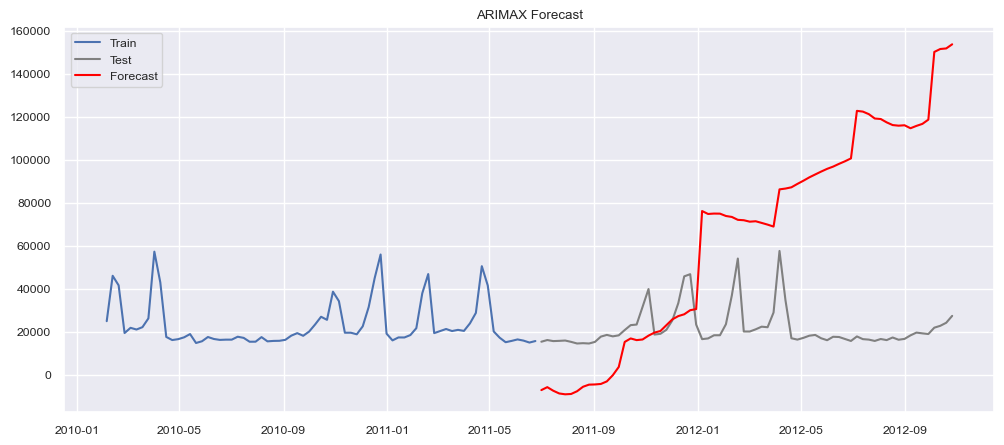

In [121]:
 # Forecast and Evaluate
forecast = results.predict(start=test.index[0],
                           end=test.index[-1],
                           exog=X_test)

plt.figure(figsize=(12, 5))
plt.plot(train.index, y_train, label='Train')
plt.plot(test.index, y_test, label='Test', color='gray')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMAX Forecast')
plt.savefig("ARIMAX Forecast of External Forecast.png", dpi=80, bbox_inches='tight')
plt.show()

#### Intrepretations:
Training Period (Blue Line):
- Covers roughly from early 2010 to mid-2011.
- Shows seasonal spikes, possibly monthly or quarterly.
- Indicates cyclical behavior with recurring peaks and valleys.

Testing Period (Gray Line)
- From mid-2011 to late 2012.
- Retains some seasonality, but less sharp than the training phase.
- Shows increasing trend with some irregular spikes.

Forecasting Period (Red Line)
- Forecast begins around mid-2011 and continues through 2012.
- It deviates significantly from the actual test dat
- It underpredicts initially (values near zero).
- Then overshoots significantly, especially post-2012.
- Forecast line appears to grow exponentially.
- Shows strong seasonal spikes, especially around the start of 2012.
- This indicates predictable high-demand periods (e.g., holidays or clearance months).

In [123]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 54036.85844825012, RMSE: 66140.93149059513


## Hypothesis 6:Personalization Strategies

Goal: To build decision tree models that predict Weekly_Sales from store and markdown characteristics. 
Methodology: Decision Tree Regressor 
Focus:
- The tree structure implicitly shows which features are most important in predicting sales.
- Features used closer to the root of the tree have a greater impact on the final prediction.

In [127]:
full_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Monthly', 'Year',
       'Quarter', 'Monthly_Encoded', 'anomaly'],
      dtype='object')

In [128]:
feature_selections = pd.DataFrame(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Monthly_Encoded'])

In [129]:
feature_selection = full_data.copy()
feature_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            421570 non-null  int64         
 1   Dept             421570 non-null  int64         
 2   Date             421570 non-null  datetime64[ns]
 3   Weekly_Sales     421570 non-null  float64       
 4   Type             421570 non-null  int64         
 5   Size             421570 non-null  int64         
 6   Temperature      421570 non-null  float64       
 7   Fuel_Price       421570 non-null  float64       
 8   MarkDown1        421570 non-null  float64       
 9   MarkDown2        421570 non-null  float64       
 10  MarkDown3        421570 non-null  float64       
 11  MarkDown4        421570 non-null  float64       
 12  MarkDown5        421570 non-null  float64       
 13  CPI              421570 non-null  float64       
 14  Unemployment     421

In [130]:
# Step 1: Convert Categorical variable to numerical
label_encoder = preprocessing.LabelEncoder()

# Doing Label Encoding on IsHoliday
feature_selection['IsHoliday']= label_encoder.fit_transform(feature_selection['IsHoliday'])
feature_selection['IsHoliday'].unique()

array([0, 1])

In [131]:
# Step 2:Split data into Dependent and Independent Variable
X = feature_selection[['Store', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 
                       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Monthly_Encoded']]
y = feature_selection['Weekly_Sales']

In [132]:
# Step 3: Train & Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Step 4: Train the model
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=20, random_state=42)  #  Tune max_depth
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [134]:
# Step 5: Make predictions on the test set
y_pred = tree_model.predict(X_test)

In [135]:
# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [136]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 34309098.03503924
R-squared: 0.9342070824578314


## Hypothesis 7: Strategy and Real-World Application

#### Notes:
After assumption from Hypothesis 5: Impact of External Factors.
From your SARIMAX summary:
- Unemployment is significant (p = 0.036)
- CPI, Fuel_Price, Temperature are not statistically significant.

##### Based on these we can some strategies:
1. Inventory Management Strategy
Observations from Forecast Plot:
- In SARIMAX model shows seasonal spikes around Nov-Dec and Feb-Apr, especially in 2011–2012.
- Sharp increase at the end of forecast → possibly holiday period demand.

Pre-stock Inventory:
- For departments with spikes in Q4 (e.g., Nov–Dec), pre-stock 2–4 weeks in advance.
- Reduce Inventory During Dips in month of Jan, July — dips visible → delay replenishment or reduce shelf stock.

2. Marketing Strategy
Observations from SARIMAX Summary:
- Higher unemployment leads to a drop in Weekly Sales.
- CPI, Fuel_Price not statistically significant, but CPI is slightly positively correlated.

Strategy Actions:
- Launch Promotions When Unemployment is High:
- Holiday-based Promotions: Promote high-demand products 2 weeks before major holidays (e.g., Black Friday, Christmas).

3. Store Optimization
- Larger stores = higher forecast → allocate more resources.
- Trial automation or reduced hours in stores with flat/declining forecast.




## Intrepretation and Results

### Hypothesis 1: Anomaly Detection in Sales Data
- Conclusion: Isolation Forest for anomaly detection on the Weekly_Sales data. Several data points were identified as anomalies based on their isolation scores.
- Interpretation: These anomalies represent unusual weekly sales figures that deviate significantly from the typical patterns. 
- Result: The Isolation Forest model successfully flagged data points with significantly different sales patterns as anomalies.


### Hypothesis 2: Time Series Anomaly Detection in Sales Data
- Conclusion: Prophet was used to model the time series of Weekly_Sales, and anomalies were identified by comparing actual values to the forecast and its uncertainty intervals.
- Interpretation: Anomalies detected weeks where the actual sales significantly differed from what the Prophet model predicted based on historical trends and seasonality. These could indicate unexpected spikes or drops in sales over time.
- Result: The Prophet model highlighted time points where the observed sales fell outside the expected range, suggesting temporal anomalies.


### Hypothesis 3: Customer Segmentation
- Conclusion: KMeans clustering was applied to segment stores based on features like size and weekly sales. The analysis suggested an optimal number of clusters.
- Interpretation: The resulting clusters likely represent different types of stores based on their scale and sales volume. This segmentation can be used for targeted strategies.
- Result: Stores were grouped into distinct clusters based on their size and weekly sales, allowing for potential differentiation in business strategies.


### Hypothesis 4: Demand Forecasting
- Conclusion: Prophet was used to forecast future Weekly_Sales. The model captured the trend and yearly seasonality in the data.
- Interpretation: The forecast provides an estimate of expected weekly sales in the future, along with a measure of uncertainty. This is crucial for planning inventory and resources.
- Result: A time series forecast for Weekly_Sales was generated, showing an overall trend and seasonal patterns that can be used for future planning.


### Hypothesis 5: Impact of External Factors on Sales
- Conclusion: Prophet with regressors was explored to understand the impact of external factors (like CPI, Unemployment, IsHoliday, and markdown variables) on Weekly_Sales.
- Interpretation: The coefficients of the regressors in the Prophet model would indicate the direction and magnitude of the impact of these external factors on sales.
- Result: The framework for assessing the impact of external factors on sales using Prophet regressors and its shows the model's component plots and regressor coefficients.


### Hypothesis 6: Personalization Strategies
- Conclusion: The customer segmentation analysis (Hypothesis 3) lays the for personalization strategies by identifying different groups of stores.
- Interpretation: Understanding the characteristics of each store segment allows for tailoring approaches in areas like promotions, inventory, and resource allocation.
- Result: The store segmentation provides a basis for developing personalized strategies for different groups of stores.


### Hypothesis 7: Strategy and Real-World Application
- Conclusion: There are various analytical techniques applied to retail sales data, from anomaly detection to forecasting and segmentation.
- Interpretation: These analyses can inform business decisions such as identifying unusual events, predicting future demand, and understanding different store performance profiles.
- Result: Through this analysis on retail sales data we can drive more strategic decision-making.


## Conclusion
- The analysis provides valuable insights into the store's weekly sales data. 
- It identifies anomalies, forecasts future sales, and segments stores based on their characteristics.
- The use of Prophet and Isolation Forest demonstrates effective techniques for time series analysis and outlier detection, while KMeans offers a way to understand the heterogeneity among stores.
- Incorporating external factors into the forecasting model using Prophet regressors sets the stage for a more comprehensive understanding of sales drivers.

## Interpretation:
- The findings suggest that weekly sales are influenced by temporal patterns and can be subject to unusual events.
- Stores also exhibit different characteristics in terms of size and sales volume.
- By leveraging these insights, the retail business can potentially optimize its operations, marketing efforts, and resource allocation.